In [12]:
## hi

In [ ]:
#pip install scipy

## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II



**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



# Code

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [11]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


## Part 1: Analyzing Best-Seller Trends Across Product Categories


### 1. Crosstab Analysis:

- Create a crosstab between the product category and the isBestSeller status.

- Are there categories where being a best-seller is more prevalent?

- Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [22]:
part1 = df.copy()

In [24]:
part1.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [40]:
crostab_part1 = pd.crosstab(df["category"], df["isBestSeller"])

In [42]:
crostab_part1

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [63]:
crostab_part1["percentage"] = crostab_part1[True] / crostab_part1[False]

In [65]:
crostab_part1

isBestSeller,False,True,percentage
category,,,
Grocery,9008,556,0.061723
Smart Home Security & Lighting,98,6,0.061224
Health & Personal Care,9017,552,0.061218
Mobile Phone Accessories,248,11,0.044355
Power & Hand Tools,8353,306,0.036634
...,...,...,...
Internal TV Tuner & Video Capture Cards,253,0,0.000000
Motherboards,259,0,0.000000
Motorbike Chassis,107,0,0.000000


In [219]:
crostab_part1 = crostab_part1.sort_values(by="percentage", ascending=False)

In [57]:
crostab_part1

isBestSeller,False,True,percentage
category,,,
Grocery,9008,556,0.061723
Smart Home Security & Lighting,98,6,0.061224
Health & Personal Care,9017,552,0.061218
Mobile Phone Accessories,248,11,0.044355
Power & Hand Tools,8353,306,0.036634
...,...,...,...
Internal TV Tuner & Video Capture Cards,253,0,0.000000
Motherboards,259,0,0.000000
Motorbike Chassis,107,0,0.000000


In [202]:
#- Are there categories where being a best-seller is more prevalent?

# yes, 

#Grocery	                      9008     556     0.061723
#Smart Home Security & Lighting	   98	   6	   0.061224
#Health & Personal Care	          9017	   552	   0.061218

### 2. Statistical Tests:

- Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
- Compute Cramér's V to understand the strength of association between best-seller status and category.

In [119]:
df_statistical_2 = df.copy()

In [121]:
df_statistical_2.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [126]:
from scipy.stats import chi2_contingency

In [136]:
## Chi-square test for 'MSZoning' and 'SaleCondition'
#chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result)

In [130]:
chi2_stats, chi2_pvalue, _, _= chi2_contingency(crostab_part1)

In [204]:
chi2_pvalue   #if p.value - 0,05 reject h0  and accept h1, if its more than 0,05 we can not reject H0.

0.0

In [207]:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.


# H0 category and best seller are independent 
# h1 category and best seller are dependent

In [140]:
crostab_part1.head(6)

isBestSeller,False,True,percentage
category,,,
Grocery,9008,556,0.061723
Smart Home Security & Lighting,98,6,0.061224
Health & Personal Care,9017,552,0.061218
Mobile Phone Accessories,248,11,0.044355
Power & Hand Tools,8353,306,0.036634
"Billiard, Snooker & Pool",241,8,0.033195


In [191]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.

In [165]:
from scipy.stats.contingency import association

In [167]:
crostab_part2 = crostab_part1.copy()

In [184]:
# cramer works only with intergers  (percentage was floats)

In [171]:
crostab_part2["percentage"] =  (crostab_part2["percentage"] * 100)

In [175]:
crostab_part2["percentage"] = crostab_part2["percentage"].astype(int)

In [189]:
crostab_part2.head(2)

isBestSeller,False,True,percentage
category,,,
Grocery,9008,556,6
Smart Home Security & Lighting,98,6,6


In [210]:
association(crostab_part2, method='cramer')

0.10729118323450833

In [213]:
## Compute Cramér's V to understand the strength of association between best-seller status and category.

# the association is weak

### 3.Visualizations:

- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


In [234]:
crostab_part1.head(7)

isBestSeller,False,True,percentage
category,,,
Grocery,9008,556,0.061723
Smart Home Security & Lighting,98,6,0.061224
Health & Personal Care,9017,552,0.061218
Mobile Phone Accessories,248,11,0.044355
Power & Hand Tools,8353,306,0.036634
"Billiard, Snooker & Pool",241,8,0.033195
Pet Supplies,9152,285,0.031141


In [ ]:
crostab_part1

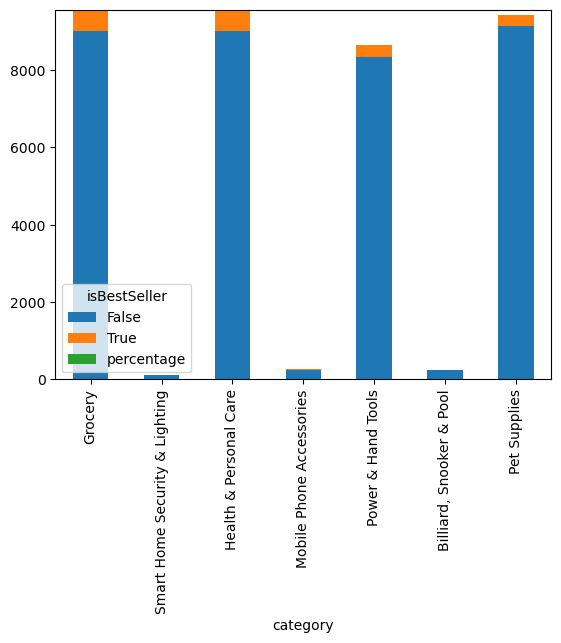

In [262]:
c33de = crostab_part1.copy()
c33de = c33de[:7] 
c33de.plot(kind='bar', stacked=True)
plt.show()

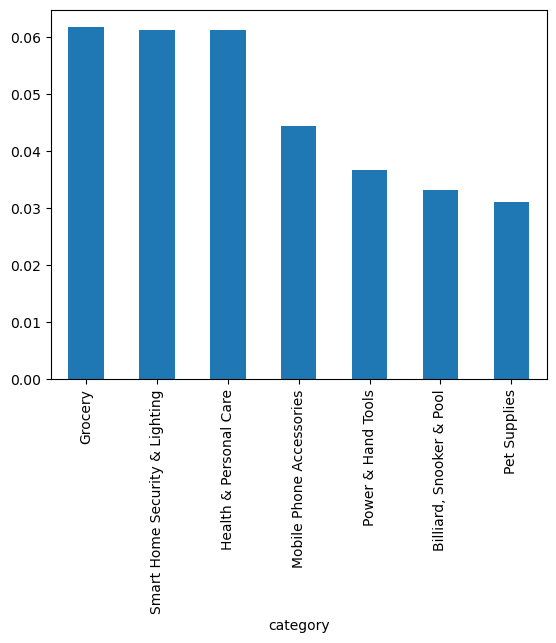

In [278]:
c33de = crostab_part1.copy()
c33de = c33de[:7] 
c33de["percentage"].plot(kind='bar', stacked=True)
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
- Objective: Investigate how different product categories influence product price

### 0. Preliminary Step: Remove outliers in product prices.

- For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

- Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

In [388]:
part2_exploring = df.copy()

In [390]:
part2_exploring.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [392]:
part2_exploring = part2_exploring[["category","price"]]

In [394]:
part2_exploring.shape #with outliers #2443651        without  outliers #2115963  

(2443651, 2)

In [396]:
part2_exploring.head(3)

,category,price
0,Hi-Fi Speakers,21.99
1,Hi-Fi Speakers,23.99
2,Hi-Fi Speakers,21.99


In [399]:
test_part2_Ex = part2_exploring.describe()
test_part2_Ex = pd.DataFrame(test_part2_Ex)

In [401]:
test_part2_Ex["price"] = test_part2_Ex["price"].round(2)


In [403]:
test_part2_Ex

,price
count,2443651.00
mean,89.24
std,345.61
min,0.00
25%,9.99
50%,19.09
75%,45.99
max,100000.00


In [405]:
q1 = 9.99
q2 = 19.09
q3 = 45.99

In [407]:
iqr = q3 - q1   #interquartil range
iqr

36.0

In [409]:
#lower limit 
lower_limit = q1 - 1.5 * iqr
lower_limit

-44.01

In [411]:
#max limit 
max_limit = q3 + 1.5 * iqr
max_limit

99.99000000000001

In [413]:
# std ** 2
varianza_p = 345.61 ** 2

In [415]:
part2_exploring["price"].max()

100000.0

In [423]:
part2_exploring_no_outliers = part2_exploring[(part2_exploring["price"] >= lower_limit) & (part2_exploring["price"] <= max_limit)]


part2_exploring_no_outliers

,category,price
0,Hi-Fi Speakers,21.99
1,Hi-Fi Speakers,23.99
2,Hi-Fi Speakers,21.99
3,Hi-Fi Speakers,31.99
4,Hi-Fi Speakers,17.99
...,...,...
2443646,Motorbike Clothing,22.34
2443647,Motorbike Clothing,97.99
2443648,Motorbike Clothing,52.99
2443649,Motorbike Clothing,79.99


In [430]:
part2_exploring_no_outliers["price"].max()

99.99

### 1. Violin Plots:

- Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
- Which product category tends to have the highest median price? Don't filter here by top categories.

In [475]:
df.head(2)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers


In [477]:
violin_plots = part2_exploring_no_outliers.copy()

In [480]:
violin_plots.head(6)

,category,price
0,Hi-Fi Speakers,21.99
1,Hi-Fi Speakers,23.99
2,Hi-Fi Speakers,21.99
3,Hi-Fi Speakers,31.99
4,Hi-Fi Speakers,17.99
5,Hi-Fi Speakers,31.99


In [543]:
test_violin = violin_plots["category"].value_counts()
test_violin = test_violin[:5]
test_violin

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Name: count, dtype: int64

In [547]:
test_violin = pd.DataFrame(test_violin)
test_violin = test_violin.reset_index()
test_violin

,category,count
0,Sports & Outdoors,694092
1,Beauty,19233
2,Bath & Body,19050
3,Manicure & Pedicure Products,18904
4,"Handmade Clothing, Shoes & Accessories",18811


In [549]:
filt_d_violin = violin_plots.merge(test_violin, on="category")


In [551]:
filt_d_violin  # only 5 categories

,category,price,count
0,Sports & Outdoors,6.49,694092
1,Sports & Outdoors,49.99,694092
2,Sports & Outdoors,16.98,694092
3,Sports & Outdoors,19.95,694092
4,Sports & Outdoors,49.99,694092
...,...,...,...
770085,Sports & Outdoors,99.67,694092
770086,Sports & Outdoors,20.62,694092
770087,Sports & Outdoors,59.86,694092
770088,Sports & Outdoors,14.99,694092


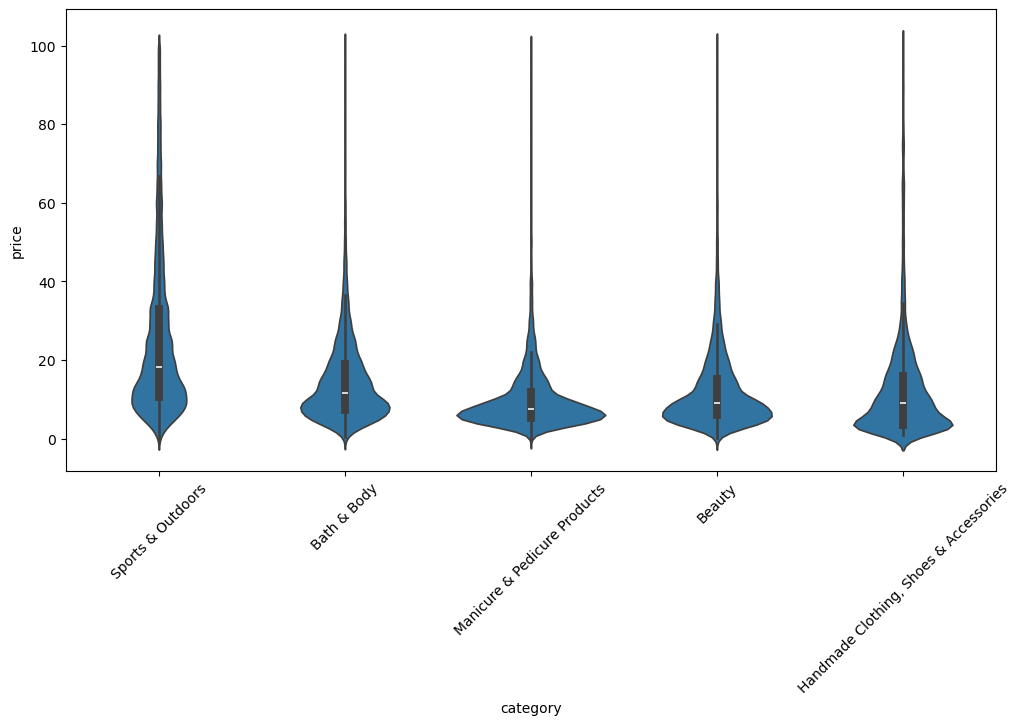

In [555]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=filt_d_violin)
plt.xticks(rotation=45)   
plt.show()


### 2. Bar Charts:

- Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
- Which product category commands the highest average price? Don't filter here by top categories.

In [1130]:
df_barcharts = df.copy()

In [1131]:
df_barcharts.head(0)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category


In [1134]:
df_mean_price = df_barcharts.groupby("category")["price"].mean().reset_index()

In [1136]:
df_mean_price.head(2)

,category,price
0,3D Printers,1018.036129
1,3D Printing & Scanning,99.909599


In [1137]:
df_mean_price.columns = ["category", "average_price"]

In [1138]:
#df_mean_price.head(0)

In [1140]:
df_mean_price.head(2)

,category,average_price
0,3D Printers,1018.036129
1,3D Printing & Scanning,99.909599


In [1143]:
df_mean_price = df_mean_price.sort_values(by="average_price", ascending=False)

In [1144]:
df_mean_price.head(2)

,category,average_price
165,Laptops,1087.987827
0,3D Printers,1018.036129


C:\Users\SKARLET\AppData\Local\Temp\ipykernel_13444\93415807.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="average_price", y="category", data=test_aaa, palette="viridis")


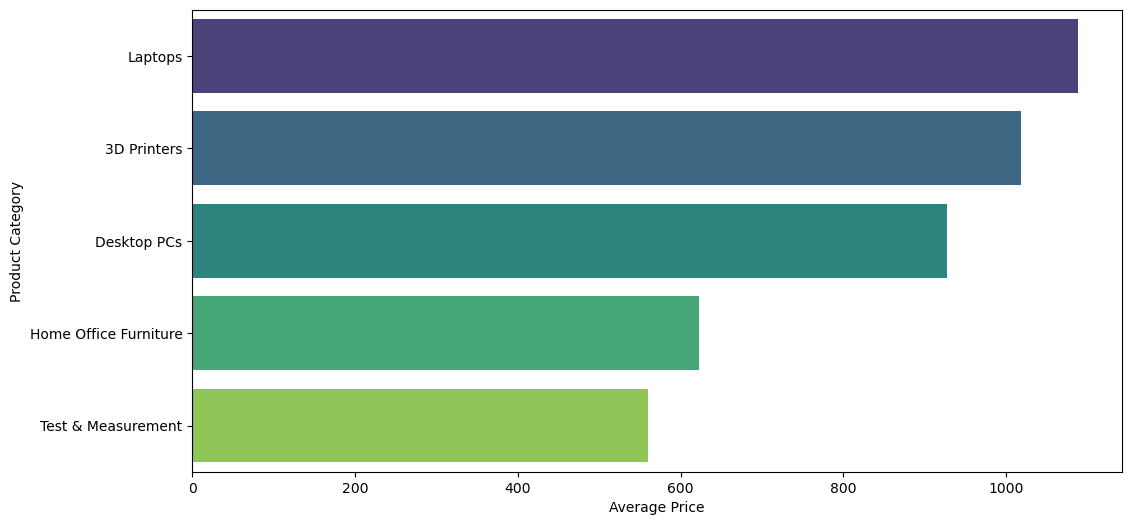

In [1147]:
test_aaa = df_mean_price.copy()
test_aaa = test_aaa[:5]
plt.figure(figsize=(12, 6))
sns.barplot(x="average_price", y="category", data=test_aaa, palette="viridis")
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.show()


### 3. Box Plots:

- Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
- Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

## Part 3: Investigating the Interplay Between Product Prices and Ratings
- Objective: Analyze how product ratings (stars) correlate with product prices.

### 1. Correlation Coefficients:

- Calculate the correlation coefficient between price and stars.
- Is there a significant correlation between product price and its rating?

In [769]:
df.head(0)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category


In [771]:
part3_rating = df.copy()


In [773]:
part3_rating.head(1)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


In [775]:
pearson_corr = part3_rating["stars"].corr(part3_rating["price"])

In [777]:
# -1 a 1
# 0.1 - 0.3 weak cor 
#0.3 - 0.5 moderate cor 
#0.5 - 0.7 strong corr 
#0.7 - 1.0 very strong cor 

pearson_corr = pearson_corr.round(2)    
pearson_corr           #we only use pearson when we don't have many outliers

#no correlation between stars and price

-0.12

In [780]:
spearman_corr  =  part4_rating
spearman_corr = part3_rating[["stars","price",]] 

In [782]:
spearman_corr.head(2)

,stars,price
0,4.7,21.99
1,4.7,23.99


In [785]:
#classs #spearman_correlations_sorted = num.corrwith(df['SalePrice'], method='pearson').sort_values(ascending=False) # positive ones  #spearman_correlations_sorted
spearman_corr = spearman_corr.corrwith(df["stars"], method='spearman')
spearman_corr

stars    1.000000
price   -0.133164
dtype: float64

In [787]:
 # -1 a 1
# 0.1 - 0.3 weak cor 
#0.3 - 0.5 moderate cor 
#0.5 - 0.7 strong corr 
#0.7 - 1.0 very strong cor 


#no correlation between stars and price

### 2. Visualizations:

- Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
- Use a correlation heatmap to visualize correlations between all numerical variables.
- Examine if product prices typically follow a normal distribution using a QQ plot.

In [652]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

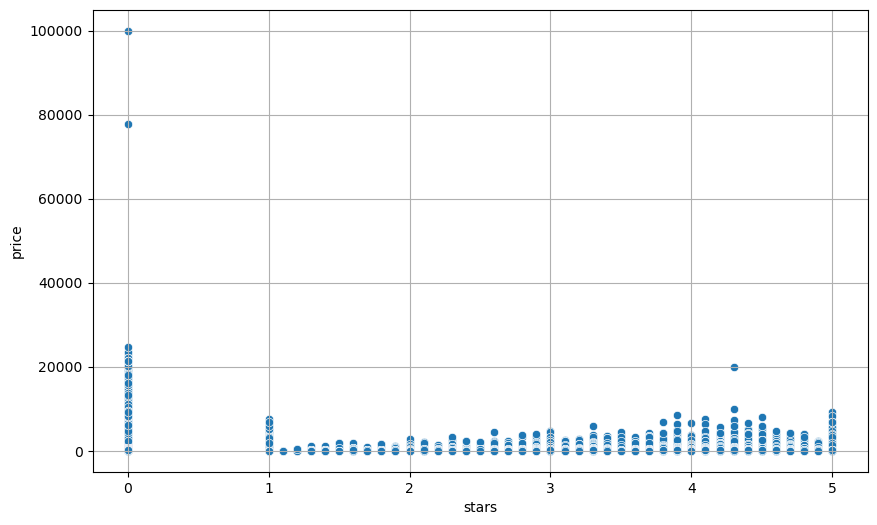

In [655]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=part3_rating, x="stars", y="price")
plt.grid(True)
plt.show()


In [657]:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

#not seem clear at all, i don't know

In [ ]:
correlation_matrix = num.corr()

In [622]:
#Use a correlation heatmap to visualize correlations between all numerical variables.

In [879]:
test_heatmap = part3_rating.copy()

In [887]:
test_heatmap = test_heatmap[["stars","price"]]
test_heatmap.head(1)

,stars,price
0,4.7,21.99


In [890]:
test_heatmap = test_heatmap.corr()

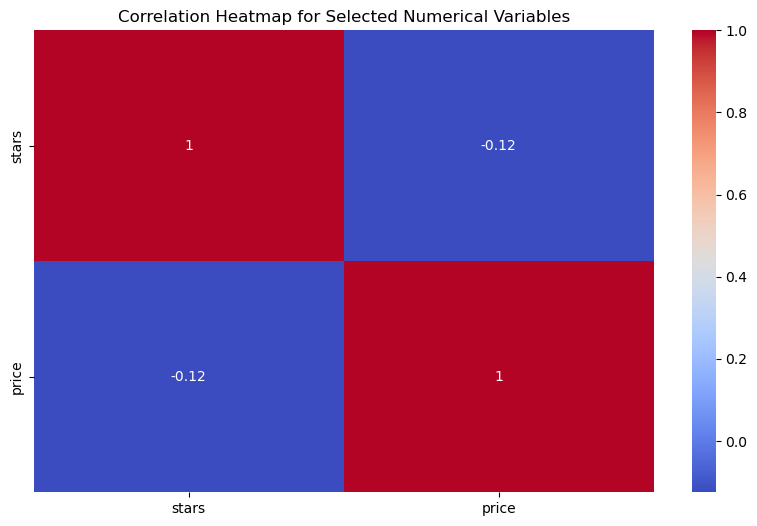

In [894]:
 
plt.figure(figsize=(10, 6))
 
sns.heatmap(test_heatmap, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

# s